In [1]:
import lvmnebular
import numpy as np

In [2]:
u=lvmnebular.simulation()
u.loadsim('Bubble_v2_1e-11',900)

Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-11



In [3]:
u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), loadfile=True, plot=False)


Fitting Emmission Lines: ['9069' '7319' '7320' '7330' '6731' '6717' '6584' '6563' '6548' '6312'
 '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970' '3729' '3726']


UnboundLocalError: local variable 'filename' referenced before assignment

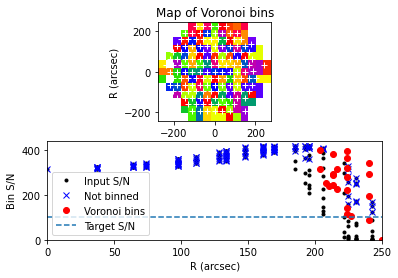

In [4]:
u.voronoibin(target_sn=100, lineid='5755', plot=True)
print(np.shape(u.vorbinflux), np.shape(u.vorbinerr), np.shape(u.err), np.shape(u.flux), np.shape(u.wave))


In [4]:
u.runpyneb(niter=4, bin=False, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:285: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/miniconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amrita/LVM/lvmnebular/lvmnebular.py:304: RuntimeWarning: Mean of empty slice
  self.TeO3 = np.nanmean(TO3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:321: RuntimeWarning: Mean of empty slice
  self.TeN2 = np.nanmean(TN2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:340: RuntimeWarning: Mean of empty slice
  self.TeS2 = np.nanmean(TS2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:357: RuntimeWarning: Mean of empty slice
  self.TeS3 = np.nanmean(TS3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:375: RuntimeWarning: Mean of empty slice
  self.neO2 = np.nanmean(NO2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:389: RuntimeWarning: Mean of empty 

(157,)
(157, 1)
(157, 1)


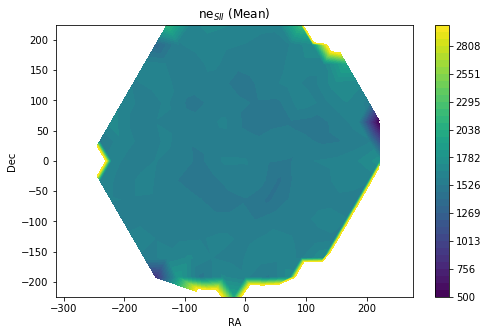

In [122]:
u.plotmap(u.linefitdict['neS2'], 500 , 3000, title=r'ne$_{SII}$ (Mean)', output='neS2')


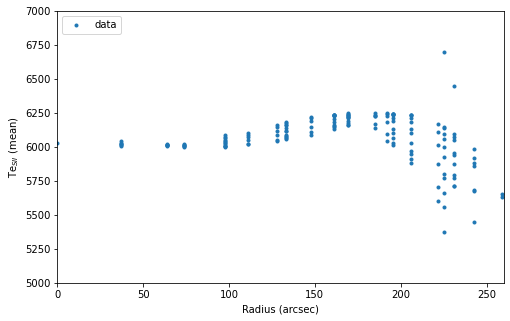

In [5]:
u.plotprofile(u.linefitdict['TeS2'], 5000, 7000, title=r'Te$_{SII}$ (mean)', output='TeS2')

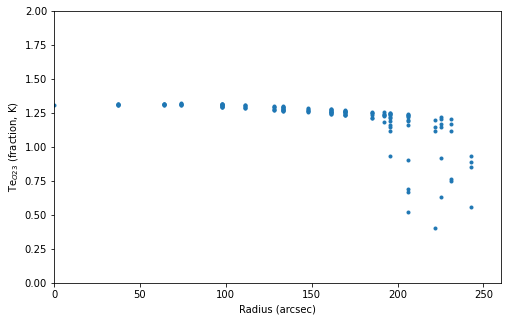

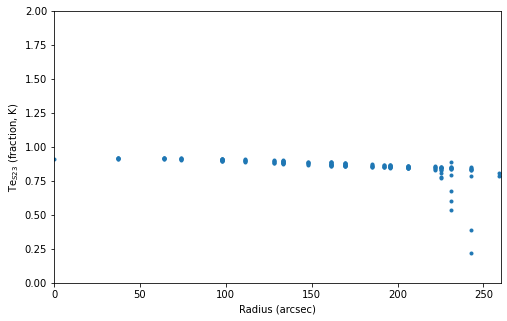

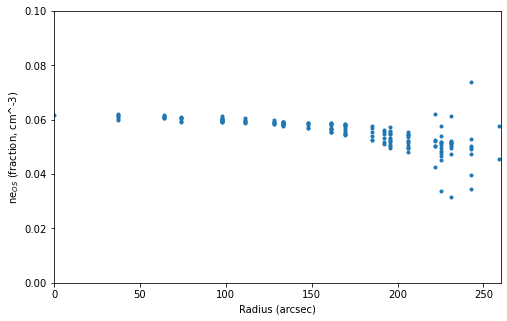

In [51]:
u.plotprofile(np.divide(u.linefitdict['TeO2'], u.linefitdict['TeO3']), 0, 2, title=r'Te$_{O23}$ (fraction, K)', output='TeO23 frac')
u.plotprofile(np.divide(u.linefitdict['TeS2'], u.linefitdict['TeS3']), 0, 2, title=r'Te$_{S23}$ (fraction, K)', output='TeS23 frac')
u.plotprofile(np.divide(u.linefitdict['neO2'], u.linefitdict['neS2']), 0, 0.1, title=r'ne$_{OS}$ (fraction, cm^-3)', output='TeOS2 frac')

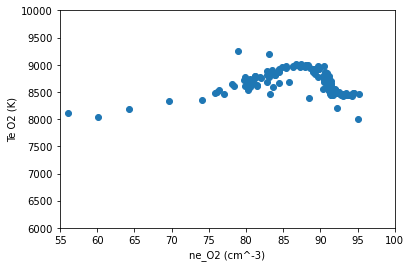

In [36]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neO2'], u.linefitdict['TeO2'])
plt.xlabel('ne_O2 (cm^-3)')
plt.ylabel('Te O2 (K)')
plt.ylim(6000, 10000)
plt.xlim(55, 100)
title='Te vs ne for OII.png'
plt.savefig(u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)

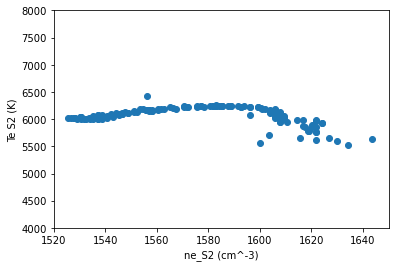

In [35]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neS2'], u.linefitdict['TeS2'])
plt.xlabel('ne_S2 (cm^-3)')
plt.ylabel('Te S2 (K)')
plt.ylim(4000, 8000)
plt.xlim(1520, 1650)
title='Te vs ne for SII.png'
plt.savefig(u.datadir+u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neO2'], u.linefitdict['TeO2'])
plt.xlabel('ne_O2 (cm^-3)')
plt.ylabel('Te O2 (K)')
plt.ylim(6000, 10000)
plt.xlim(55, 100)
title='Te vs ne for OII.png'
plt.savefig(u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)

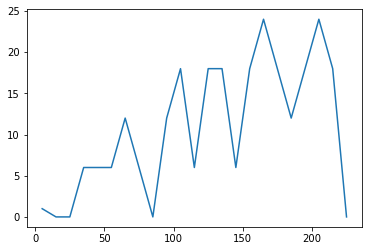

In [8]:
u.radialbin(rbinmax=240, drbin=10)